In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('DataSet/Business_Case.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372834 entries, 0 to 372833
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   session_id          372834 non-null  object 
 1   platform            372834 non-null  object 
 2   open_at             372834 non-null  object 
 3   user_id             372834 non-null  object 
 4   country             372832 non-null  object 
 5   ab_cohort_id        372834 non-null  int64  
 6   segment_id          372834 non-null  int64  
 7   session_length      372834 non-null  int64  
 8   session_number_     372834 non-null  int64  
 9   publisher_revenue   372834 non-null  float64
 10  fs_shown            372834 non-null  int64  
 11  rv_shown            372834 non-null  int64  
 12  game_count          372834 non-null  int64  
 13  offline_game_count  372834 non-null  int64  
 14  acquired_at         372834 non-null  object 
 15  segment_name        372834 non-nul

In [4]:
df['session_id'].duplicated().value_counts()

False    371926
True        908
Name: session_id, dtype: int64

In [5]:
# on drop les doublons
df = df.drop_duplicates(subset=['session_id'])

In [6]:
df['session_id'].duplicated().value_counts()

False    371926
Name: session_id, dtype: int64

In [7]:
df.head()

,session_id,platform,open_at,user_id,country,ab_cohort_id,segment_id,session_length,session_number_,publisher_revenue,fs_shown,rv_shown,game_count,offline_game_count,acquired_at,segment_name,ab_name,ab_cohort_name
0,e058d9e3-ea0c-4d16-a36e-3e9ed3840457,android,2020-02-09 11:27:45.717000,3675ed02-ea35-4f01-8375-2ee48b06ac5c,TN,790,783,36,5,0.000010,0,0,1,0,2020-02-08 10:35:38.630000,android_new_users,ab-test_android,gameTune
1,6b9d2f3d-fe82-45fb-9c67-9408934393b1,android,2020-02-09 11:04:38.491000,3675ed02-ea35-4f01-8375-2ee48b06ac5c,TN,790,783,158,4,0.000110,1,0,1,0,2020-02-08 10:35:38.630000,android_new_users,ab-test_android,gameTune
2,bdf0bb00-9241-4e2a-969b-c55267befa76,android,2020-02-09 10:59:48.496000,3675ed02-ea35-4f01-8375-2ee48b06ac5c,TN,790,783,90,3,0.000020,1,0,0,0,2020-02-08 10:35:38.630000,android_new_users,ab-test_android,gameTune
3,79ea0b6c-ea19-480d-b6b4-60acbef70241,android,2020-02-05 12:15:02.907000,51ea5d8d-9b28-4111-ab23-40961dc43321,AE,789,783,517,1,0.055515,7,0,4,0,2020-02-05 12:15:02.907000,android_new_users,ab-test_android,xxHigh
4,f5f1f67f-ac44-45ba-9650-07b8081d897f,android,2020-02-07 06:03:13.014000,ecfbf8db-300f-4ceb-a533-47d9bf0c9fc7,AE,790,783,385,1,0.014300,2,0,5,0,2020-02-07 06:03:13.014000,android_new_users,ab-test_android,gameTune


In [8]:
df_filtrer = df.copy()

In [9]:
# on drop les colonnes inutile a notre analyse, on sectionne seulement les métriques pertinentes selon nous pour notre analyse
liste_delete = ['session_id','ab_cohort_id','segment_id','segment_name', 'acquired_at','ab_name','fs_shown','rv_shown','game_count','offline_game_count','session_number_','user_id','open_at']
df_filtrer.drop(liste_delete, axis=1, inplace=True)

In [10]:
df_filtrer.head()

,platform,country,session_length,publisher_revenue,ab_cohort_name
0,android,TN,36,0.000010,gameTune
1,android,TN,158,0.000110,gameTune
2,android,TN,90,0.000020,gameTune
3,android,AE,517,0.055515,xxHigh
4,android,AE,385,0.014300,gameTune


In [11]:
df_filtrer.describe()

,session_length,publisher_revenue
count,371926.000000,371926.000000
mean,343.111987,0.037649
std,428.274068,0.059512
min,0.000000,0.000000
25%,73.000000,0.001890
50%,200.000000,0.016980
75%,462.000000,0.049339
max,41561.000000,2.891824


Nettoyons le DataSet, après la suppressions de doublons, voyons la distribution et les valeurs aberrante

voyons voir si nos variables numérique suivent une distributions normales

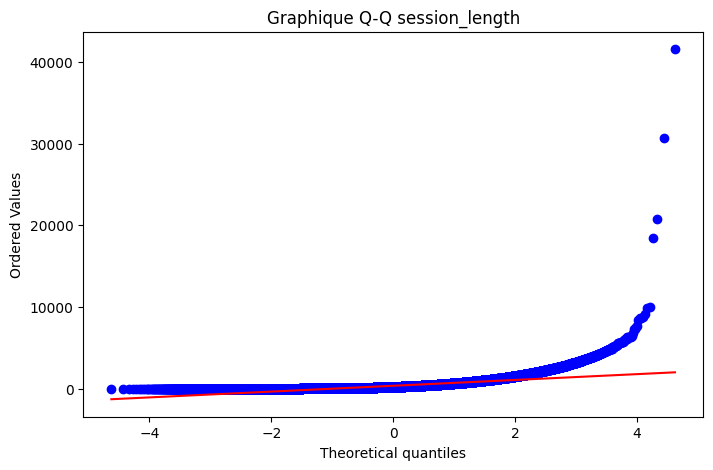

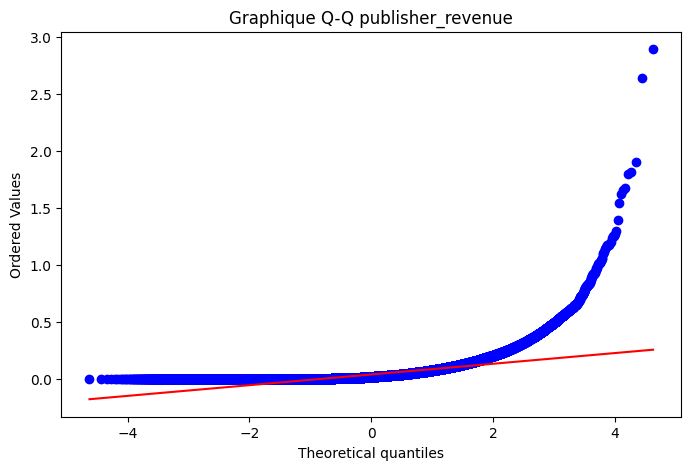

In [12]:
liste_colonne = ['session_length','publisher_revenue']
for colonne in liste_colonne:
    plt.figure(figsize=(8, 5))
    stats.probplot(df_filtrer[colonne], dist="norm", plot=plt)
    plt.title(f"Graphique Q-Q {colonne}")
    plt.show()
    print('\n')

In [13]:
# Test de Kolmogorov-Smirnov
for colonne in liste_colonne:

  statistic, p_value = stats.kstest(df[colonne], 'norm')

  print(f'{colonne}\nStatistique K-S: {statistic} \nP-value: {p_value}')

  if p_value < 0.05:
      print("Rejet de l'hypothèse de normalité")
  else:
      print("Les données suivent une distribution normale")
  print('\n')

session_length
Statistique K-S: 0.9519418858178453 
P-value: 0.0
Rejet de l'hypothèse de normalité


publisher_revenue
Statistique K-S: 0.5 
P-value: 0.0
Rejet de l'hypothèse de normalité




Voyons voir les valeurs aberrante

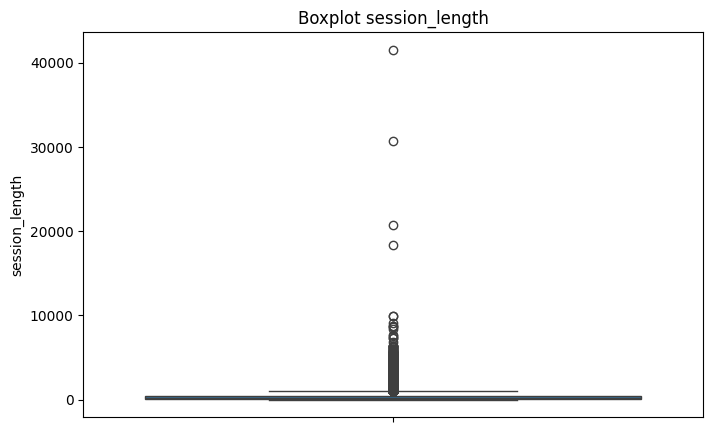

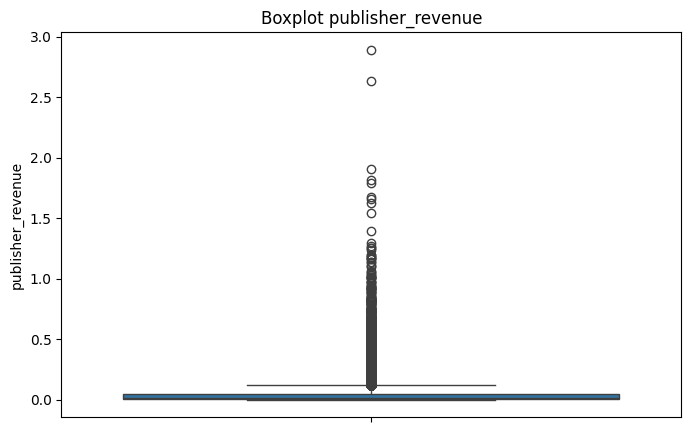

In [14]:
for colonne in liste_colonne:
    plt.figure(figsize=(8, 5))
    sns.boxplot(df_filtrer[colonne])
    plt.title(f"Boxplot {colonne}")
    plt.show()
    print('\n')

analyse des valeurs aberrante

Mon analyse se basera sur le jeu de données sans les valeurs aberrantes, car ces valeurs représentent une minorité de la population qui ne reflète pas ma population cible. Mon objectif est de réaliser une analyse précise qui reflète les comportements réels de ma population dans son ensemble.

In [15]:
# Data set avec uniquement les valeurs aberrante

outliers_total = pd.DataFrame()

for colonne in liste_colonne:
    Q1 = df_filtrer[colonne].quantile(0.25)
    Q3 = df_filtrer[colonne].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Ajouter les outliers à un DataFrame séparé
    outliers = df_filtrer[(df_filtrer[colonne] < lower_bound) | (df_filtrer[colonne] > upper_bound)]
    outliers_total = pd.concat([outliers_total, outliers])

In [16]:
# Data set sans outliers
df_filtrer_sans_outliers_total = df_filtrer.copy()

for colonne in liste_colonne:
    Q1 = df_filtrer[colonne].quantile(0.25)
    Q3 = df_filtrer[colonne].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_filtrer_sans_outliers_total = df_filtrer_sans_outliers_total[
        (df_filtrer_sans_outliers_total[colonne] >= lower_bound) &
        (df_filtrer_sans_outliers_total[colonne] <= upper_bound)
    ]

In [17]:
df_filtrer_sans_outliers_total.describe()

,session_length,publisher_revenue
count,331862.000000,331862.000000
mean,244.237454,0.023821
std,233.380498,0.028334
min,0.000000,0.000000
25%,67.000000,0.001303
50%,165.000000,0.012219
75%,362.000000,0.036520
max,1045.000000,0.120505


In [18]:
print(f"{df_filtrer_sans_outliers_total.shape}\n{df_filtrer.shape}")

(331862, 5)
(371926, 5)


j'ai perdu 10% de mon data set, c'est assez négligeable dans mon contexte

In [19]:
pourcentage_occurence = df_filtrer_sans_outliers_total['platform'].value_counts(normalize=True) * 100
print(pourcentage_occurence)

android    68.04937
ios        31.95063
Name: platform, dtype: float64


In [20]:
# Filtrer le DataFrame pour les utilisateurs Android
df_android = df_filtrer_sans_outliers_total[df_filtrer_sans_outliers_total['platform'] == 'android']

# Filtrer le DataFrame pour les utilisateurs iOS
df_ios = df_filtrer_sans_outliers_total[df_filtrer_sans_outliers_total['platform'] == 'ios']

In [21]:
print(f"taille data set android :{df_android.shape}\ntaille data set ios : {df_ios.shape}")

taille data set android :(225830, 5)
taille data set ios : (106032, 5)


le jeu de donnée ios étant quand même conséquent, je pourrais analyser les plateformes pour voir s'il y'a une différence notable entre les deux population

## Analyse sans outliers

In [22]:
df_filtrer_sans_outliers_total.head()

,platform,country,session_length,publisher_revenue,ab_cohort_name
0,android,TN,36,0.000010,gameTune
1,android,TN,158,0.000110,gameTune
2,android,TN,90,0.000020,gameTune
3,android,AE,517,0.055515,xxHigh
4,android,AE,385,0.014300,gameTune


In [23]:
df_filtrer_sans_outliers_total.describe()

,session_length,publisher_revenue
count,331862.000000,331862.000000
mean,244.237454,0.023821
std,233.380498,0.028334
min,0.000000,0.000000
25%,67.000000,0.001303
50%,165.000000,0.012219
75%,362.000000,0.036520
max,1045.000000,0.120505


In [24]:
# voyons les corrélation

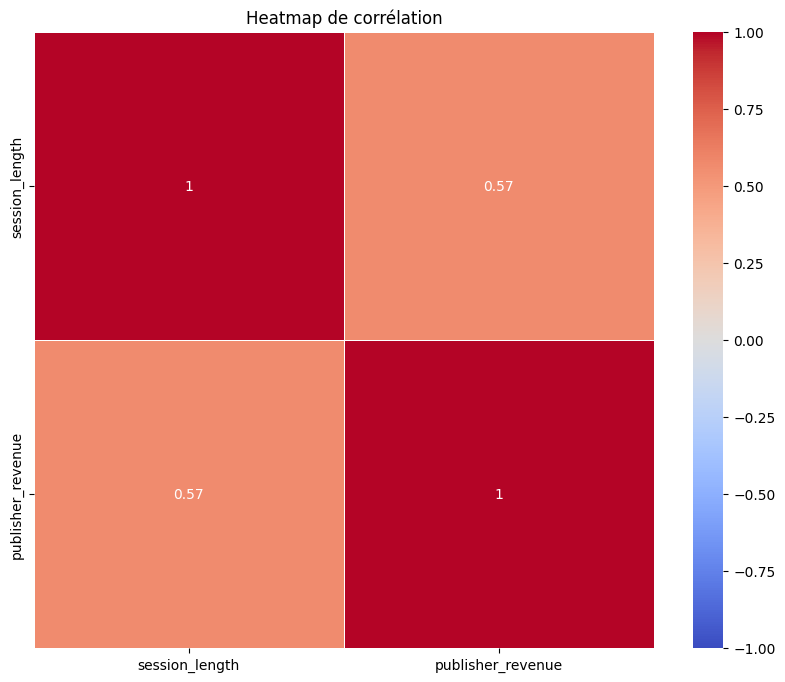

In [25]:
corr_matrix = df_filtrer_sans_outliers_total[['session_length', 'publisher_revenue']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Heatmap de corrélation')
plt.show()

mes deux variables évolue positivement ensemble

In [26]:
# cherchons quelle fréquence de pub maximise nos deux kpi

In [27]:
# Calculons la moyenne pour chaque variable en fonction de 'ab_cohort_name'
grouped_means = df_filtrer_sans_outliers_total.groupby('ab_cohort_name').agg({
    'session_length': 'mean',
    'publisher_revenue': 'mean'
}).reset_index()

print(grouped_means)

  ab_cohort_name  session_length  publisher_revenue
0        control      242.078880           0.024168
1       gameTune      238.339283           0.024454
2          xHigh      237.308317           0.024796
3           xLow      252.536067           0.022693
4         xxHigh      236.945767           0.024729
5          xxLow      257.429078           0.022185


In [28]:
mean_kpis = df_filtrer_sans_outliers_total.groupby('ab_cohort_name')[['session_length', 'publisher_revenue']].mean().reset_index()

mean_kpis['normalized_session_length'] = (mean_kpis['session_length'] - mean_kpis['session_length'].min()) / (mean_kpis['session_length'].max() - mean_kpis['session_length'].min())
mean_kpis['normalized_publisher_revenue'] = (mean_kpis['publisher_revenue'] - mean_kpis['publisher_revenue'].min()) / (mean_kpis['publisher_revenue'].max() - mean_kpis['publisher_revenue'].min())

mean_kpis['compromise_score'] = (mean_kpis['normalized_session_length'] + mean_kpis['normalized_publisher_revenue']) / 2

best_compromise_frequency = mean_kpis.loc[mean_kpis['compromise_score'].idxmax(), 'ab_cohort_name']

print(mean_kpis[['ab_cohort_name', 'session_length', 'publisher_revenue', 'normalized_session_length', 'normalized_publisher_revenue', 'compromise_score']])
print("La fréquence avec le meilleur compromis est :", best_compromise_frequency)

  ab_cohort_name  session_length  publisher_revenue  \
0        control      242.078880           0.024168   
1       gameTune      238.339283           0.024454   
2          xHigh      237.308317           0.024796   
3           xLow      252.536067           0.022693   
4         xxHigh      236.945767           0.024729   
5          xxLow      257.429078           0.022185   

   normalized_session_length  normalized_publisher_revenue  compromise_score  
0                   0.250600                      0.759417          0.505009  
1                   0.068032                      0.869050          0.468541  
2                   0.017700                      1.000000          0.508850  
3                   0.761122                      0.194580          0.477851  
4                   0.000000                      0.974335          0.487168  
5                   1.000000                      0.000000          0.500000  
La fréquence avec le meilleur compromis est : xHigh


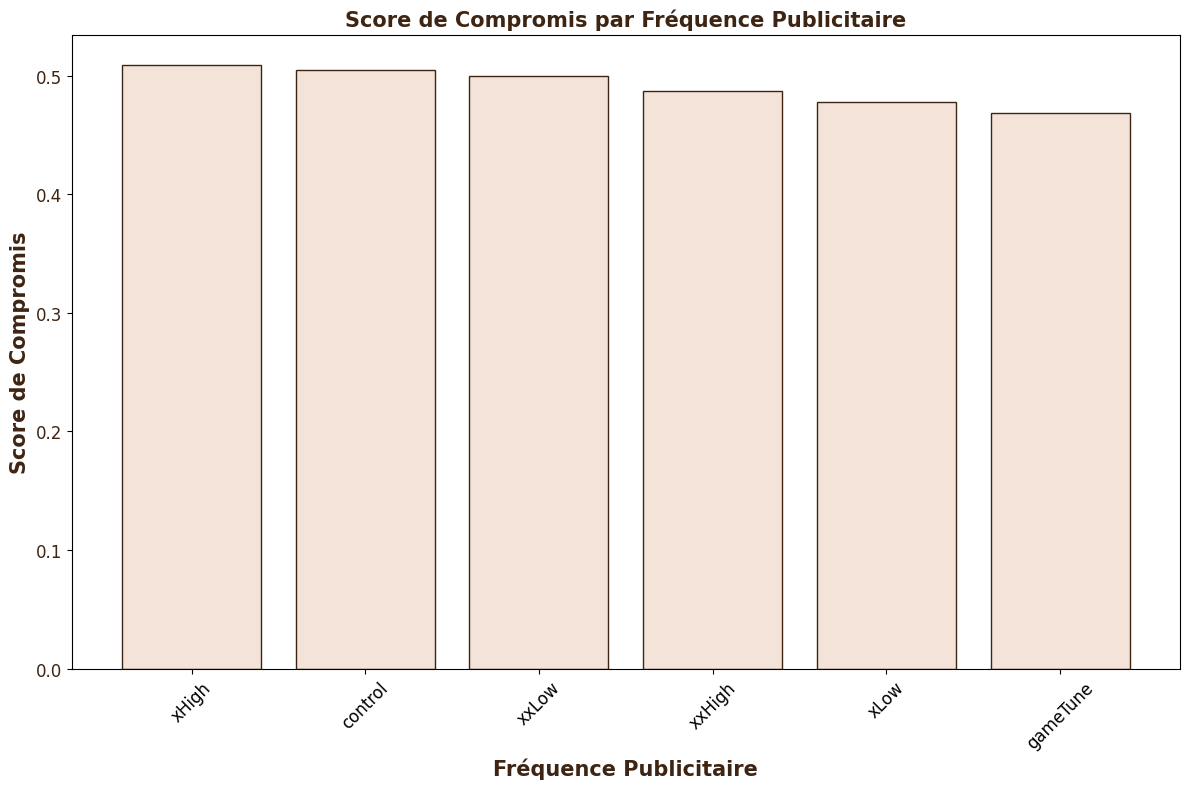

In [29]:
mean_kpis_sorted = mean_kpis.sort_values(by='compromise_score', ascending=False)

# Création du graphique en barres pour les scores de compromis
plt.figure(figsize=(12, 8))
plt.bar(mean_kpis_sorted['ab_cohort_name'], mean_kpis_sorted['compromise_score'], color='#F3E3D8', edgecolor='#3E2513')
plt.title("Score de Compromis par Fréquence Publicitaire", fontsize=15, fontweight='bold', fontfamily='sans-serif', color='#3E2513')
plt.xlabel("Fréquence Publicitaire", fontsize=15, fontweight='bold', fontfamily='sans-serif', color='#3E2513')
plt.ylabel("Score de Compromis", fontsize=15, fontweight='bold', fontfamily='sans-serif', color='#3E2513')
plt.xticks(rotation=45, fontsize=12, fontfamily='sans-serif')
plt.yticks(fontsize=12, fontfamily='sans-serif', color='#3E2513')

# Retirer la grille
plt.grid(False)

plt.tight_layout()
plt.show()

### analyse en fonction des plateformes

In [30]:
df_android.describe()

,session_length,publisher_revenue
count,225830.000000,225830.000000
mean,266.813479,0.020657
std,246.304036,0.025620
min,0.000000,0.000000
25%,72.000000,0.001200
50%,186.000000,0.009738
75%,403.000000,0.031214
max,1045.000000,0.120494


In [31]:
df_ios.describe()

,session_length,publisher_revenue
count,106032.000000,106032.000000
mean,196.154387,0.030559
std,194.592107,0.032372
min,0.000000,0.000000
25%,57.000000,0.001880
50%,132.000000,0.021500
75%,280.000000,0.050512
max,1045.000000,0.120505


NB : Les utilisateurs IOS ont une durée de session en moyenne inférieur a la durée de session des utilisateurs android

In [32]:
grouped_means_android = df_ios.groupby('ab_cohort_name').agg({
    'session_length': 'mean',
    'publisher_revenue': 'mean'
}).reset_index()

print(grouped_means_android)

  ab_cohort_name  session_length  publisher_revenue
0        control      196.525992           0.031019
1       gameTune      186.149586           0.031432
2          xHigh      186.689895           0.032372
3           xLow      208.491161           0.029090
4         xxHigh      182.219375           0.031927
5          xxLow      214.333135           0.027810


In [33]:
grouped_means_ios = df_ios.groupby('ab_cohort_name').agg({
    'session_length': 'mean',
    'publisher_revenue': 'mean'
}).reset_index()

print(grouped_means_ios)

  ab_cohort_name  session_length  publisher_revenue
0        control      196.525992           0.031019
1       gameTune      186.149586           0.031432
2          xHigh      186.689895           0.032372
3           xLow      208.491161           0.029090
4         xxHigh      182.219375           0.031927
5          xxLow      214.333135           0.027810


### Pour IOS

In [34]:
# Calcul des moyennes de durée de session et de revenu par fréquence publicitaire
mean_kpis = df_ios.groupby('ab_cohort_name')[['session_length', 'publisher_revenue']].mean().reset_index()

# Normalisation des valeurs de durée de session et de revenu pour chaque fréquence
mean_kpis['normalized_session_length'] = (mean_kpis['session_length'] - mean_kpis['session_length'].min()) / (mean_kpis['session_length'].max() - mean_kpis['session_length'].min())
mean_kpis['normalized_publisher_revenue'] = (mean_kpis['publisher_revenue'] - mean_kpis['publisher_revenue'].min()) / (mean_kpis['publisher_revenue'].max() - mean_kpis['publisher_revenue'].min())

# Calcul du score moyen comme compromis entre les deux KPI
mean_kpis['compromise_score'] = (mean_kpis['normalized_session_length'] + mean_kpis['normalized_publisher_revenue']) / 2

# Identification de la fréquence avec le meilleur compromis (score le plus élevé)
best_compromise_frequency = mean_kpis.loc[mean_kpis['compromise_score'].idxmax(), 'ab_cohort_name']

print(mean_kpis[['ab_cohort_name', 'session_length', 'publisher_revenue', 'normalized_session_length', 'normalized_publisher_revenue', 'compromise_score']])
print("La fréquence avec le meilleur compromis est :", best_compromise_frequency)

  ab_cohort_name  session_length  publisher_revenue  \
0        control      196.525992           0.031019   
1       gameTune      186.149586           0.031432   
2          xHigh      186.689895           0.032372   
3           xLow      208.491161           0.029090   
4         xxHigh      182.219375           0.031927   
5          xxLow      214.333135           0.027810   

   normalized_session_length  normalized_publisher_revenue  compromise_score  
0                   0.445498                      0.703384          0.574441  
1                   0.122384                      0.794004          0.458194  
2                   0.139209                      1.000000          0.569604  
3                   0.818085                      0.280604          0.549345  
4                   0.000000                      0.902502          0.451251  
5                   1.000000                      0.000000          0.500000  
La fréquence avec le meilleur compromis est : control


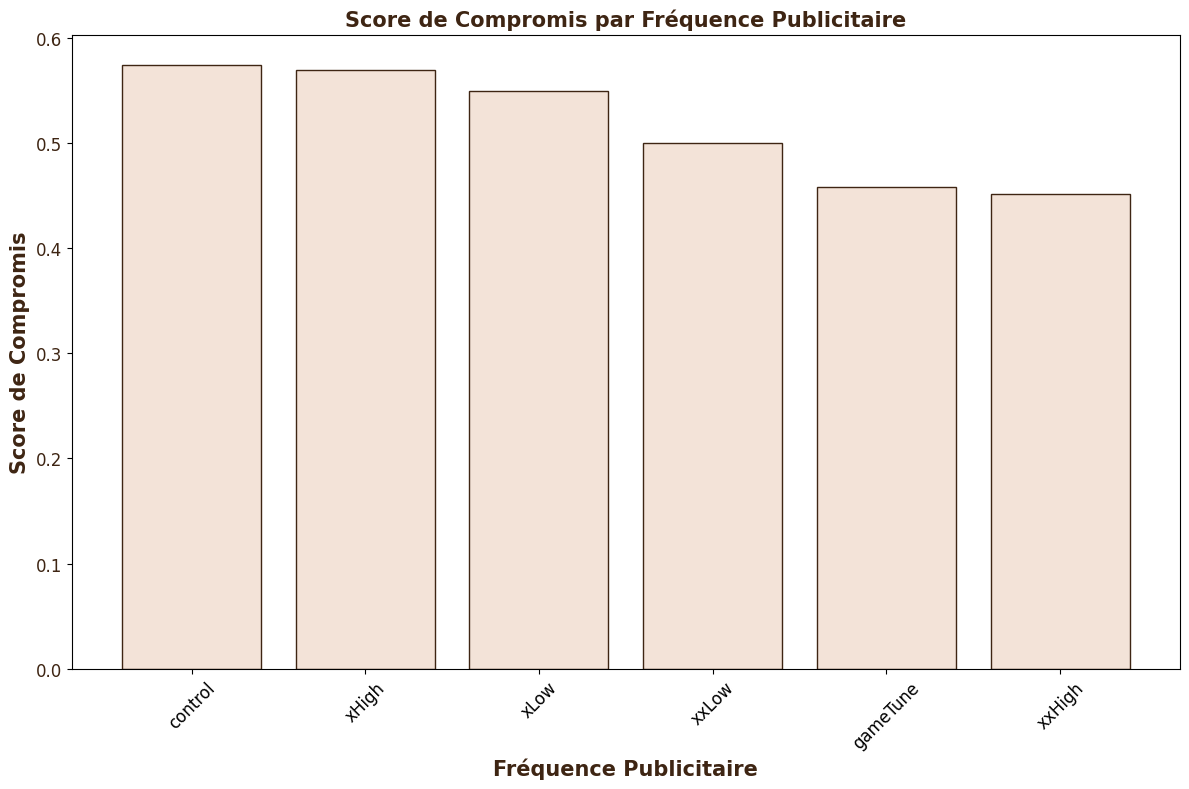

In [35]:
import matplotlib.pyplot as plt

mean_kpis_sorted = mean_kpis.sort_values(by='compromise_score', ascending=False)

# Création du graphique en barres pour les scores de compromis
plt.figure(figsize=(12, 8))
plt.bar(mean_kpis_sorted['ab_cohort_name'], mean_kpis_sorted['compromise_score'], color='#F3E3D8', edgecolor='#3E2513')
plt.title("Score de Compromis par Fréquence Publicitaire", fontsize=15, fontweight='bold', fontfamily='sans-serif', color='#3E2513')
plt.xlabel("Fréquence Publicitaire", fontsize=15, fontweight='bold', fontfamily='sans-serif', color='#3E2513')
plt.ylabel("Score de Compromis", fontsize=15, fontweight='bold', fontfamily='sans-serif', color='#3E2513')
plt.xticks(rotation=45, fontsize=12, fontfamily='sans-serif')
plt.yticks(fontsize=12, fontfamily='sans-serif', color='#3E2513')

plt.grid(False)

plt.tight_layout()
plt.show()

### Pour android

In [36]:
import pandas as pd
import numpy as np

mean_kpis = df_android.groupby('ab_cohort_name')[['session_length', 'publisher_revenue']].mean().reset_index()

mean_kpis['normalized_session_length'] = (mean_kpis['session_length'] - mean_kpis['session_length'].min()) / (mean_kpis['session_length'].max() - mean_kpis['session_length'].min())
mean_kpis['normalized_publisher_revenue'] = (mean_kpis['publisher_revenue'] - mean_kpis['publisher_revenue'].min()) / (mean_kpis['publisher_revenue'].max() - mean_kpis['publisher_revenue'].min())

mean_kpis['compromise_score'] = (mean_kpis['normalized_session_length'] + mean_kpis['normalized_publisher_revenue']) / 2

best_compromise_frequency = mean_kpis.loc[mean_kpis['compromise_score'].idxmax(), 'ab_cohort_name']

print(mean_kpis[['ab_cohort_name', 'session_length', 'publisher_revenue', 'normalized_session_length', 'normalized_publisher_revenue', 'compromise_score']])
print("La fréquence avec le meilleur compromis est :", best_compromise_frequency)

  ab_cohort_name  session_length  publisher_revenue  \
0        control      264.301337           0.020825   
1       gameTune      263.009178           0.021155   
2          xHigh      260.630587           0.021305   
3           xLow      273.575431           0.019637   
4         xxHigh      260.793997           0.021592   
5          xxLow      278.207016           0.019472   

   normalized_session_length  normalized_publisher_revenue  compromise_score  
0                   0.208845                      0.638281          0.423563  
1                   0.135328                      0.793946          0.464637  
2                   0.000000                      0.864652          0.432326  
3                   0.736489                      0.077522          0.407005  
4                   0.009297                      1.000000          0.504649  
5                   1.000000                      0.000000          0.500000  
La fréquence avec le meilleur compromis est : xxHigh


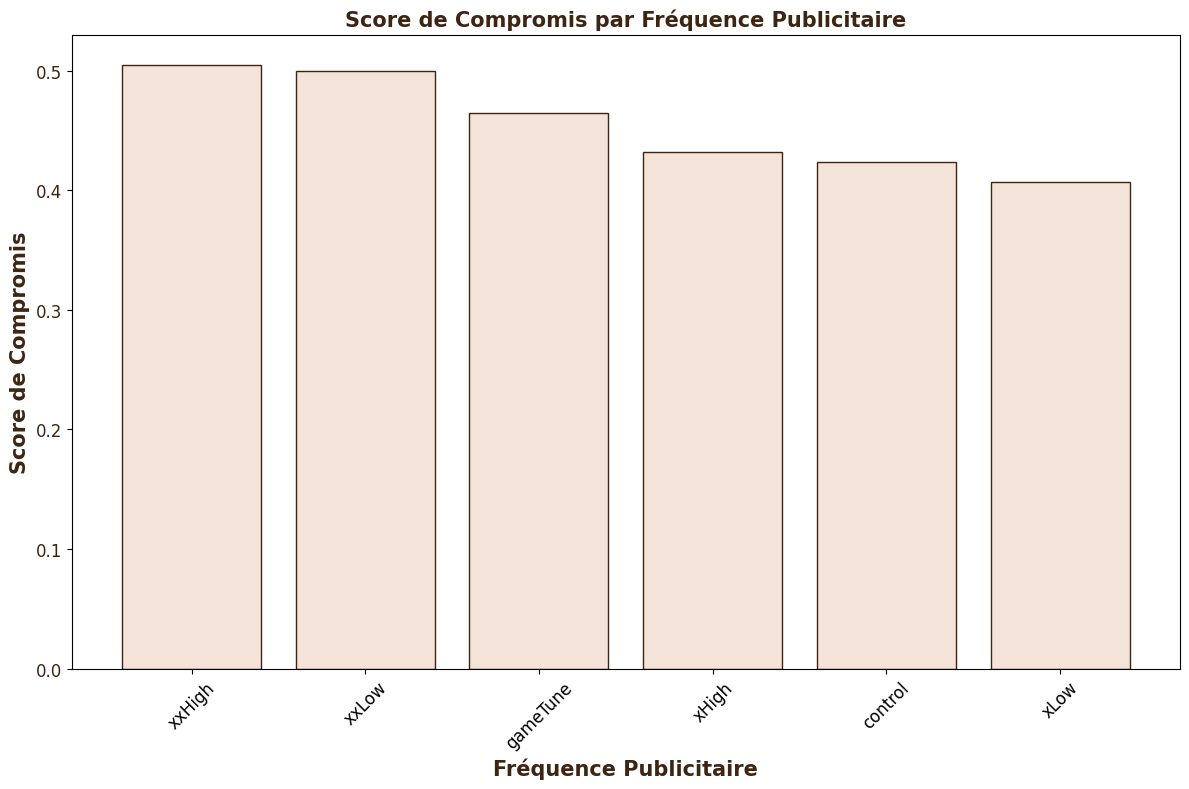

In [37]:
import matplotlib.pyplot as plt

mean_kpis_sorted = mean_kpis.sort_values(by='compromise_score', ascending=False)

# Création du graphique en barres pour les scores de compromis
plt.figure(figsize=(12, 8))
plt.bar(mean_kpis_sorted['ab_cohort_name'], mean_kpis_sorted['compromise_score'], color='#F3E3D8', edgecolor='#3E2513')
plt.title("Score de Compromis par Fréquence Publicitaire", fontsize=15, fontweight='bold', fontfamily='sans-serif', color='#3E2513')
plt.xlabel("Fréquence Publicitaire", fontsize=15, fontweight='bold', fontfamily='sans-serif', color='#3E2513')
plt.ylabel("Score de Compromis", fontsize=15, fontweight='bold', fontfamily='sans-serif', color='#3E2513')
plt.xticks(rotation=45, fontsize=12, fontfamily='sans-serif')
plt.yticks(fontsize=12, fontfamily='sans-serif', color='#3E2513')

plt.grid(False)

plt.tight_layout()
plt.show()

Après mon analyse en fonction des plateformes, fort est de contacter que la fréquence qui maximise nos deux kpi pour android est XXHigh, cepedant pour ios les résultat sont pareil que lorsque ous faisions l'analyse global sans différencier les plateforme

- Le fait que Android montre une performance supérieure avec la fréquence XXHigh suggère que les utilisateurs Android peuvent être plus réceptifs à des fréquences publicitaires plus élevées. Cela pourrait signifier qu'ils tolèrent mieux un nombre élevé d'annonces, ce qui génère à la fois de plus longues sessions et des revenus plus élevés.

Suggestion:
- Approche personnalisée : Adapter la fréquence publicitaire en fonction de la plateforme. Ce genre de segmentation pourrait améliorer globalement l'expérience utilisateur tout en maximisant les revenus sur chaque plateforme.

## Analyse en fonction de pays

In [38]:
df_filtrer_sans_outliers_total.head()

,platform,country,session_length,publisher_revenue,ab_cohort_name
0,android,TN,36,0.000010,gameTune
1,android,TN,158,0.000110,gameTune
2,android,TN,90,0.000020,gameTune
3,android,AE,517,0.055515,xxHigh
4,android,AE,385,0.014300,gameTune


In [39]:
iso_data = pd.read_csv('DataSet/countries_iso_codes.csv')

In [40]:
iso_data.head()

,Country,ISO Code
0,Tunisia,TN
1,United Arab Emirates,AE
2,Argentina,AR
3,Australia,AU
4,Albania,AL


In [41]:
# Fusionnons les deux DataFrames sur la colonne ISO (supposons que la colonne 'country' dans df contient les codes ISO)
df_merged = df_filtrer_sans_outliers_total.merge(iso_data, left_on='country', right_on='ISO Code', how='left')
df_merged.head()


,platform,country,session_length,publisher_revenue,ab_cohort_name,Country,ISO Code
0,android,TN,36,0.000010,gameTune,Tunisia,TN
1,android,TN,158,0.000110,gameTune,Tunisia,TN
2,android,TN,90,0.000020,gameTune,Tunisia,TN
3,android,AE,517,0.055515,xxHigh,United Arab Emirates,AE
4,android,AE,385,0.014300,gameTune,United Arab Emirates,AE


In [42]:
# Remplaçons la colonne 'country' (code ISO) par la colonne 'country_name' (nom complet du pays)
df_merged['country'] = df_merged['Country']
df_merged = df_merged.drop(columns=['ISO Code', 'Country'])
df_merged.head()


,platform,country,session_length,publisher_revenue,ab_cohort_name
0,android,Tunisia,36,0.000010,gameTune
1,android,Tunisia,158,0.000110,gameTune
2,android,Tunisia,90,0.000020,gameTune
3,android,United Arab Emirates,517,0.055515,xxHigh
4,android,United Arab Emirates,385,0.014300,gameTune


In [43]:
region_data = pd.read_csv('DataSet/pays_region - Sheet1 (1).csv', sep=',')

In [44]:
region_data.head()

,country,region
0,Tunisia,Africa
1,United Arab Emirates,Middle East
2,Argentina,South America
3,Australia,Oceania
4,Albania,Europe


In [45]:
df_merged = df_merged.merge(region_data, on='country', how='left')

In [46]:
df_merged.head()

,platform,country,session_length,publisher_revenue,ab_cohort_name,region
0,android,Tunisia,36,0.000010,gameTune,Africa
1,android,Tunisia,158,0.000110,gameTune,Africa
2,android,Tunisia,90,0.000020,gameTune,Africa
3,android,United Arab Emirates,517,0.055515,xxHigh,Middle East
4,android,United Arab Emirates,385,0.014300,gameTune,Middle East


In [47]:
# Calculons la moyenne pour chaque variable en fonction de la region
grouped_means_region = df_merged.groupby('region').agg({
    'session_length': 'mean',
    'publisher_revenue': 'mean'
}).reset_index()

print(grouped_means_region.sort_values(by='publisher_revenue', ascending=False))

          region  session_length  publisher_revenue
4  North America      236.734846           0.028031
5        Oceania      251.545432           0.023764
2         Europe      263.556737           0.015654
1           Asia      253.597977           0.015363
3    Middle East      254.070439           0.008772
6  South America      269.712637           0.006163
0         Africa      276.649059           0.003783


In [48]:
df_merged['region'].value_counts()

North America    231741
Europe            57740
Asia              17305
South America     11609
Middle East        7581
Oceania            3973
Africa             1912
Name: region, dtype: int64

In [49]:
# en vu de la sous représentation de l'afrique et de l'oéanie, j'ai decider de les inclures dans une catégorie 'other'
df_merged['region_grouped'] = df_merged['region'].apply(lambda x: 'Other' if x in ['Oceania', 'Africa'] else x)
df_merged['region_grouped'].value_counts()

North America    231741
Europe            57740
Asia              17305
South America     11609
Middle East        7581
Other              5885
Name: region_grouped, dtype: int64

In [50]:
import scipy.stats as stats

# Liste des régions à analyser
liste_region = ['North America', 'Europe', 'Other', 'Asia', 'South America', 'Middle East']

# Boucle sur chaque région dans la liste
for region in liste_region:
    # Filtrer les sessions pour la région en cours
    region_sessions = df_merged[df_merged['region_grouped'] == region]['session_length']

    # Calculer la moyenne des sessions pour cette région
    mean_region = region_sessions.mean()

    # Calculer l'intervalle de confiance à 95% pour cette région
    conf_interval_region = stats.t.interval(0.95, len(region_sessions)-1, loc=mean_region, scale=stats.sem(region_sessions))

    # Afficher les résultats pour chaque région
    print(f"Région: {region}")
    print(f"Mean: {mean_region:.2f}, 95% Confidence Interval: {conf_interval_region}\n")

Région: North America
Mean: 236.73, 95% Confidence Interval: (235.80636913660953, 237.6633233217815)

Région: Europe
Mean: 263.56, 95% Confidence Interval: (261.561354728749, 265.55211946591675)

Région: Other
Mean: 259.70, 95% Confidence Interval: (253.49319791551417, 265.9096907845708)

Région: Asia
Mean: 253.60, 95% Confidence Interval: (250.00009574610058, 257.1958591802213)

Région: South America
Mean: 269.71, 95% Confidence Interval: (265.1605551088313, 274.2647183858711)

Région: Middle East
Mean: 254.07, 95% Confidence Interval: (248.64834072588704, 259.4925377861826)



In [51]:
# Calculons la moyenne pour chaque variable en fonction de la region
grouped_means_region = df_merged.groupby('region_grouped').agg({
    'session_length': 'mean',
    'publisher_revenue': 'mean'
}).reset_index()

print(grouped_means_region.sort_values(by='publisher_revenue', ascending=False))

  region_grouped  session_length  publisher_revenue
3  North America      236.734846           0.028031
4          Other      259.701444           0.017272
1         Europe      263.556737           0.015654
0           Asia      253.597977           0.015363
2    Middle East      254.070439           0.008772
5  South America      269.712637           0.006163
